# Power-law creep envelopes: introduction

Copyright 2022 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), code under [Mozilla Public License 2.0](https://www.mozilla.org/en-US/MPL/2.0/).

> **Goal**: Understand flow laws and estimate a simple power-law creep envelope for the continental crust.

🚨 **this is a notebook in development and may contain errors!**

In [1]:
# import the required Python scientific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from types import SimpleNamespace

# set a custom figure style (optional, you can comment the whole block)
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'

## Introduction

At depths greater than about 10 km, rocks lie at temperatures and pressures high enough to flow under shear stresses without losing coherence (i.e. without fracturing). To describe and predict how rocks deform under such conditions, earth scientists typically use mathematical equations that relate stress to strain rate. We called such relationship a **flow law**, _deformation law_, or a *constitutive equation*, where _constitutive_ refers to the constitution of the material. To model the deformation at these depths using a flow law, earth scientists commonly make the following assumptions: (1) that the strain rate is constant, or, in the case of a shear zone, (3) that the displacement is constant (both will be constant only if the thickness of the shear zone remains constant with depth, which is rarely the case if ever. We will discuss these assumptions later, let's focus now on how to formulate a flow law.

> 👉 As a rule of thumb, at temperatures about half the rock melting temperature, rocks flow leading to irreversible deformation when the shear stress applied is above a threshold value called the [yield stress](https://en.wikipedia.org/wiki/Yield_(engineering)). This behaviour is generally referred to as [plastic](https://en.wikipedia.org/wiki/Plasticity_(physics)) or viscoplastic deformation. For further information on rheological nomenclature see [here](http://dx.doi.org/10.31223/X5Z92Z). The two key features of (visco)plastic deformation are that **once the yield stress is exceeded** the final deformation depends mainly on time and temperature (which strongly affects strain rates). It is therefore said that (visco)plasticity is a process with a strong dependence on time and temperature.

## Step 1: The power-law creep approximation

Rock and single-crystal deformation experiments show that at low to moderate shear stresses (<200 MPa), those expected to operate in the flowing lithosphere, the relationship between differential stress and strain rate fits a power-law relationship referred to as the _power-law creep_, i.e. that strain rate ($\dot{\varepsilon}$) is proportional to the differential stress ($\sigma_{ss}$) raised to a number, named the stress exponent ($n$), as follows

$$
\dot{\varepsilon} \propto \sigma^n_{ss}  \quad (1)
$$

Commonly, a constant $C$ is added to this proportionality to take into account some factors (e.g. temperature) that may affect this power-law relationship. This is

$$
\dot{\varepsilon} = C \sigma^n_{ss}  \quad (2)
$$

> ⚠️ The creep of rocks shows dependence on variables such as temperature, grain size, pressure or water/melt content. For the sake of simplicity, we will only consider temperature here and omit other variables to define our flow law. In more advanced tutorials, we will see how other variables affect rock flow and how we can introduce them in our flow law.

Just for the sake of clarification, let's see the effect of changing the values of $n$ and $C$ in this power-law relationship:


Text(0.5, 1.0, 'The effect of $C$')

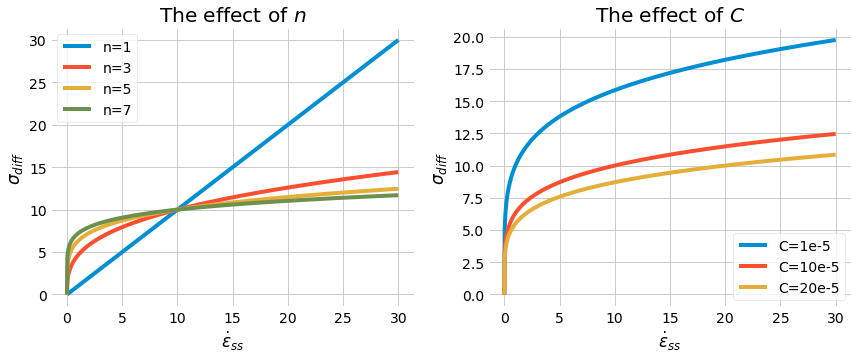

In [2]:
srates = np.linspace(0, 30, 1000)

def norm(n):
    """this is just a funtion to estimate the constant C
    value as a function of n so that all the stress vs
    strain rate curves have the same differential stress
    for a strain rate equal to 10"""
    return (10**(1 - 1/n))**-n

# estimate corresponding differential stresses using: sigma = (srates / C)**(1 / n) 
sigma_n1 = srates
sigma_n3 = (srates / norm(3))**(1 / 3)
sigma_n5 = (srates / norm(5))**(1 / 5)
sigma_n7 = (srates / norm(7))**(1 / 7)

# make figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12.8, 4.8))

ax1.plot(srates, sigma_n1, label='n=1')
ax1.plot(srates, sigma_n3, label='n=3')
ax1.plot(srates, sigma_n5, label='n=5')
ax1.plot(srates, sigma_n7, label='n=7')
ax1.legend()
ax1.set_xlabel('$\dot{\epsilon}_{ss}$')
ax1.set_ylabel('$\sigma_{diff}$')
ax1.set_title('The effect of $n$')

ax2.plot(srates, (srates / 1e-5)**(1 / 5), label='C=1e-5')
ax2.plot(srates, (srates / 10e-5)**(1 / 5), label='C=10e-5')
ax2.plot(srates, (srates / 20e-5)**(1 / 5), label='C=20e-5')
ax2.legend()
ax2.set_xlabel('$\dot{\epsilon}_{ss}$')
ax2.set_ylabel('$\sigma_{diff}$')
ax2.set_title('The effect of $C$')


Basically, the value of $n$ controls the shape of the curve while the constant $C$, simplistically, is like shifting these curves up and down. Now let's look at an example with real strain vs stress curves.

![Borch_Green_1989](https://raw.githubusercontent.com/marcoalopez/strength_envelopes/master/figures/Borch_Green_1989.png)

These curves depict a series of deformation experiments on synthetic peridotite at constant strain rates but different temperatures in Borch and Green (1989). The curves have quite similar shapes but are "shifted" up and down as in the example showing the effect of changing the values of C, suggesting that here the temperature controls the value of $C$ without affecting the value of $n$ in equation (2). In the rock deformation literature, you will find many examples of stress-strain curves where there is a clear change in the shape of the curve (i.e. a change in the value of $n$) by varying the deformation conditions or by comparing different materials. 

## Typical values of the stress exponent

Most rock types in the laboratory provide values of $n$ between 3 and 5 when deformed under conditions where dislocation creep dominates (see box below). The key question here is why in conditions where dislocation creep dominates? This is because the most typical feature in ductile natural shear zones at depths below 10-15 km is the presence of fine-grained rocks known as [mylonites](https://en.wikipedia.org/wiki/Mylonite) characterised by crystallographic preferred orientation (CPO) and microstructurues such as subgrains and dynamic recrystallization, all of which are typical features of dislocation creep. Hence, geophysicists often use power-law equations with stress exponent values $n$ derived from deformed rocks in the dislocation creep regime to model deformation in the non-frictional part of the lithosphere, a fairly reliable first approximation since most of the deformation in the lithosphere is accommodated through [crustal-scale shear zones](https://doi.org/10.1016/j.tecto.2012.06.006).

> 👉 Briefly explain [dislocation creep](https://en.wikipedia.org/wiki/Dislocation_creep) TODO. 

## Temperature dependency

As previously mentioned, when a material deforms (visco)plastically, there is a strong dependence on the temperature. This dependence is normally implemented by adding the Arrhenius model to this relationship between the differential stress and the strain rate as follows

$$
\dot{\varepsilon} = \sigma^n_d A \space exp \left( \frac{E}{RT} \right)  \quad (3)
$$
  
where $A \space exp(E/RT)$ is the Arrhenius equation. Note that the Arrhenius equation would represent the constant $C$ in the $\dot{\varepsilon} = C \sigma^n_{ss}$ equation. In this case, the higher the temperature the higher the strain rate for a similar differential stress. All other variables in the Arrhenius equation excepting $R$ are intrinsic to the material itself (see box below for details). TODO -> show how the T values affects the strain rate by fixing the other variables


> 👉 The [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation) is a formula proposed by [Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) to model reaction rates, i.e. the frequency of events per second that result in a reaction. This equation, however, is used in a general way for modelling any process involving rates and dependence on temperature such as viscosity in fluids or plasticity in solids. In our case, it will account for the frequency of events that lead to a permanent crystal lattice deformation. The equation consists of two main parts, the _pre-exponential factor_ $(A)$ which in a chemical reaction accounts for the number of events per second leading to or not to a reaction (in our case leading to or not to a permanent crystal lattice deformation), and the _exponential factor_ $exp(E/RT)$ that accounts for the probability that any given event will result in a chemical reaction (or permanent crystal lattice deformation). The _exponential factor_ includes the _activation energy_ $(E)$ needed for process being modelled to occur in $J mol^{-1}$, the _universal gas constant_ $(R)$ in $J mol^{-1} K^{-1}$, and the _absolute temperature_ $(T)$ in kelvins. The _pre-exponential factor_ $(A)$ and the _activation energy_ $(E)$ are both material-specific variables and are estimated in the laboratory for different types of rock.  

Because usually what we can measure in nature is the strain rate (e.g. via GPS or the rock record and geochronology), most of the time, we want to obtain the minimum differential stress required to deform a rock at a given strain rate. If we clear the differential stress we get

$$
\sigma_d = \dot{\varepsilon}^{(1/n)} A^{-1/n} \space exp \left( \frac{E}{nRT} \right)  \quad (4)
$$

this is the equation that we will implement next to estimate our first crustal strength envelope.

In [3]:
def power_law_creep(strain_rate, n, A, E, T):
    """ Return the necessary differential stress (Tresca criterion) in
    MPa for permanently deforming a polycrystalline material at a given
    strain rate and environmental conditions (only considering T). This
    is a simplified flow law that ignores the effect of any variable other
    than temperature and material-related constants.

    Parameters (scalars and/or arrays, all positive values)
    ----------
    strain_rate : strain rate [s**-1]........scalar or array
    n : stress exponent......................scalar
    A : material constant [MPa**-n s**-1]....scalar
    E : activation energy [J mol**-1]........scalar
    T : absolute temperature [K].............scalar or array

    Assumptions
    -----------
    - Steady-state creep
    - Low to moderate stress regime (< 200 MPa)
    - The effect of pressure, grain size, water content, and
    partial melt is ignored
    """
    R = 8.3144626  # set universal gas constant [J mol**-1 K**-1]
    
    return (strain_rate * np.exp(E / (R * T)) / A)**(1 / n)

## Step 2: Estimate and plot a power-law creep envelope for the crust

The first step is to load some Python functions contained in the script folder using the ``%run`` command. These will be used later to build the power-law creep envelopes.

In [4]:
# flow_laws_params.py contains the experimental estimates of the different parameters of the power-law creep equation
%run scripts/flow_laws_params.py

# thermal_functions contains the functions required to estimate a stable geotherm. See the "stable geotherm" notebook for details.
%run scripts/thermal_functions.py

functions loaded from 'flow_laws_params.py': 
 quartz,
 olivine, 
 olivine_Idrissi 

funtions loaded from 'thermal_functions.py': 
 turcotte_schubert_model 
 thermal_conductivity


Set some parameters of the model

In [5]:
moho = 38.8      # Continental crust thickness [m], average from Hacker et al. (2015)
T0 = 7.5         # surface temperature (taken from the KTB superdeep borehole)
ro_crust = 2750  # average rock density in the crust [kg/m**3]
g = 9.80665      # average gravitational acceleration [m/s**2]

# Set the average heat parameters for the crust.
# We will store the different parameters within an object called heat_crust
heat_crust = SimpleNamespace(Jq=65,  A=0.97, K=2.51)

Now, let's create an array with the depths and estimate the corresponding temperatures (a.k.a the geotherm) using the Turcote and Schubert model

In [6]:
# generate a linear spaced array of depths every 10 m
depths = np.linspace(start=0, stop=moho, num=3880)

# call the "turcotte_schubert_model" and pass the different arguments in order
T_crust = turcotte_schubert_model(depths, thermal=(T0, heat_crust.Jq, heat_crust.A, heat_crust.K))

# create a pandas dataframe (tabular-like data)
dataset = pd.DataFrame({'depths_km': depths,
                        'Tmodel1_C': T_crust})
dataset.round(2)

,depths_km,Tmodel1_C
0,0.00,7.50
1,0.01,7.76
2,0.02,8.02
3,0.03,8.28
4,0.04,8.54
...,...,...
3875,38.76,720.95
3876,38.77,721.06
3877,38.78,721.17
3878,38.79,721.28


In [7]:
# estimate the pressure gradient (assuming constant density in the crust)
dataset['pressure_MPa'] = (ro_crust * g * dataset['depths_km']) / 1e3  # /1e3 to obtain MPa
dataset.round(2)

,depths_km,Tmodel1_C,pressure_MPa
0,0.00,7.50,0.00
1,0.01,7.76,0.27
2,0.02,8.02,0.54
3,0.03,8.28,0.81
4,0.04,8.54,1.08
...,...,...,...
3875,38.76,720.95,1045.29
3876,38.77,721.06,1045.56
3877,38.78,721.17,1045.83
3878,38.79,721.28,1046.10


In the continental crust, it is considered as a first approximation that quartz controls deformation. Partly because it is one of the dominant mineral phases along with feldspars but is much less resistant than feldspars under similar conditions. So to simplify things once again let's use the experimental values of quartz deformation to model the strength of the continental crust. Let see which flow laws parameters are available within the quartz function

In [8]:
quartz()

Available flow laws:
'HTD' from Hirth et al. (2004)
'LP_wet' from Luan and Paterson (1992)
'GT_wet' from Gleason and Tullis (1995)
'HK_wet' from Holyoke and Kronenberg (2010)
'RB_wet' from Rutter and Brodie (2004)


Here, we will use the Hirth et al. (2004) and the Gleason and Tullis (1995) flow laws for comparison. The function ``quartz()`` returns the stress exponent ($n$), the activation energy ($E$) in $J mol^{-1}$, and the material constant ($A$) in $MPa^{-n} s^{-1}$ of the available flow laws.

In [9]:
Hirth = quartz('HTD')
Gleason = quartz('GT_wet')

# check that we obtained the three values
Gleason

namespace(n=4.0, E=223000, A=0.00011, ref='Gleason and Tullis (1995)')

estimate the differential stress at steady-state using 1.0e-14 $s^{-1}$ as the reference average shear strain rate in the ductile lithosphere.

In [10]:
dataset['model_HTD'] = power_law_creep(strain_rate=1e-14,
                                       n=Hirth.n,
                                       A=Hirth.A,
                                       E=Hirth.E,
                                       T=dataset['Tmodel1_C'] + 273.15,  # convert C to K
                                      )

dataset['model_GT'] = power_law_creep(strain_rate=1e-14,
                                      n=Gleason.n,
                                      A=Gleason.A,
                                      E=Gleason.E,
                                      T=dataset['Tmodel1_C'] + 273.15,
                                      )

dataset.round(2)

,depths_km,Tmodel1_C,pressure_MPa,model_HTD,model_GT
0,0.00,7.50,0.00,381447.54,73392481.57
1,0.01,7.76,0.27,376394.30,71793380.53
2,0.02,8.02,0.54,371417.86,70232202.00
3,0.03,8.28,0.81,366516.93,68707976.92
4,0.04,8.54,1.08,361690.21,67219762.71
...,...,...,...,...,...
3875,38.76,720.95,1045.29,11.84,2.62
3876,38.77,721.06,1045.56,11.83,2.62
3877,38.78,721.17,1045.83,11.83,2.62
3878,38.79,721.28,1046.10,11.82,2.62


Lastly, we are going to plot the "Goetze criterion" to use as a reference for the brittle field in our figure. The _Goetze criterion_, suggested by C. Goetze based on Edmond and Paterson's (1972) data, defines the condition at which the differential stress needed to produce plastic flow (i.e. the yield stress) becomes higher than the confining pressure and thus high enough for crack nucleation.
$$
\sigma_{1} - \sigma_{3} = P = \rho g h
$$

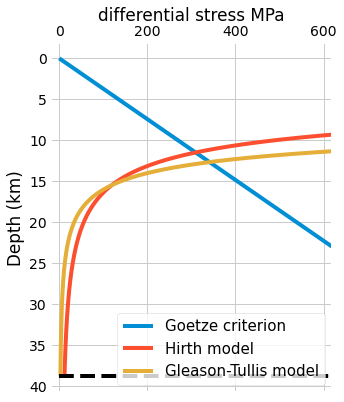

In [11]:
# plot the geotherm for the entire lithosphere
fig1, ax = plt.subplots(figsize=(4.5, 6))

# tweak the figure axe so that the depth is shown on the y-axis downwards
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# plot the strength envelopes
ax.plot(dataset['pressure_MPa'], dataset['depths_km'], label='Goetze criterion')
ax.plot(dataset['model_HTD'], dataset['depths_km'], label='Hirth model')
ax.plot(dataset['model_GT'], dataset['depths_km'], label='Gleason-Tullis model')
ax.plot([0, 1100], [moho, moho], color='black', linestyle='dashed')

ax.set(xlabel='differential stress MPa', ylabel='Depth (km)')
ax.set_xlim(left=-20, right=620)
_ = ax.legend(loc='lower right', fontsize=15)

From this figure we can see that:

- The frictional-plastic transition in the continental crust is located at a depth of between 12 and 14 km (assuming that our model of stable geotherm and the deformation rate are realistic).
- For plastic flow deformation of quartz-rich rocks right at the frictional-plastic transition, a differential stress of about 300 MPa is required. 
- Using the same parameters, Hirth et al.'s model produces shallower frictional-plastic transitions and requires slightly lower differential stress values than Gleason & Tullis' model in this transition. On the other hand, the Gleason & Tullis' model predicts a less resistant lower crust.

In the following notebooks, we will test more models and different parameters, include the lithospheric mantle, and discuss how realistic the predictions are.

In [12]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Pandas', pd.__version__)

Notebook tested in 2022-08-23 using:
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy 1.23.1
Matplotlib 3.5.1
Pandas 1.4.3
